# Alumno: Gerardo de Miguel González

## Predicción Keras 

**Practica 2** - predecir la precipitación en Madrid. Hay que entregar tanto el archivo con la prediccion (.rda) como el codigo que lo genera (.html a ser posible, si lo haceis en jupyter notebooks lo podeis guardar como .html).

 1) Si habéis predicho la ocurrencia de precipitacion y la cantidad de precipitacion por separado entonces enviadme ambas predicciones tal que:

```r
save(yTest_ocu,yTest_reg,file="yTest.rda")
```

 2) Si habeis predicho la ocurrencia y la cantidad de precipitation con el mismo modelo entonces enviadmelo asi:

```r
save(yTest,file="yTest.rda")
```

## Descripción detallada

El objetivo es diseñar una red neuronal que sea capaz de predecir el valor de la precipitación mediante la información de variables de larga escala. El dataset consiste en 450 predictores y un predictando, la precipitación en Madrid.

Hay que tener en cuenta que la precipitación es una variable mixta, ya que habrá días con un valor exacto de 0 y otros que se encuentren en el intervalo (0,inf).

Así pues, diseñar una/s red neuronal/es con KERAS, que sea capaz de predecir la precipitación de acuerdo con los siguientes índices:

  - La ocurrencia de precipitación se evalúa con el AUC.
  - La cantidad de precipitación se evalúa con el MSE.

Podréis valeros de todas las técnicas aprendidas hasta ahora: early stopping, regularización, backpropagation + momento, ajustar el learning rate, poner varias capas y demás. Esto no quiere decir que la red que contenga toda esta variedad de técnicas será la que obtenga un menor error. Tenéis que jugar y probar distintos diseños de redes con el fin de encontrar la que consideréis que obtendría un menor error en un dataset distinto (es decir, que tenga buena
capacidad de generalización).

Construiréis vuestro modelo usando xTrain e yTrain, y después evaluaréis el modelo en xTest. La predicción que resulte al evaluar el modelo en xTest es lo que tenéis que guardar en un fichero y lo que se envía para corrección:

```r
save(yTest, file = “yTest.rda”)
```

**NOTA**: se considera día de lluvia si el valor de precipitación es mayor que 1, sino convertir a 0.

## Dataset Meteo Madrid

Se proporciona el dataset `Madrid_Alumno.rda` junto con el enunciado de la práctica

In [1]:
file.info('data/Madrid_Alumno.rda')

,size,isdir,mode,mtime,ctime,atime,uid,gid,uname,grname
data/Madrid_Alumno.rda,20099579,FALSE,644,2019-03-22 11:31:26,2019-03-22 11:31:26,2019-03-31 18:40:47,1000,100,jovyan,users


In [2]:
#::GMG::Cargo en memoria el rda
# https://stat.ethz.ch/R-manual/R-devel/library/base/html/load.html
load('data/Madrid_Alumno.rda')

In [3]:
#::GMG::Tengo los tres "objetos" que se mencionan en el enunciado
ls()

[1] "xTest"  "xTrain" "yTrain"

In [4]:
str(xTest)

 num [1:2192, 1:450] 57168 56932 56256 55960 55665 ...


In [5]:
class(xTest)

[1] "matrix"

In [6]:
dim(xTest)

[1] 2192  450

In [7]:
str(xTrain)

 num [1:8766, 1:450] 57043 56963 56523 54628 53584 ...


In [8]:
class(xTrain)

[1] "matrix"

In [9]:
dim(xTrain)

[1] 8766  450

In [10]:
str(yTrain)

 num [1:8766(1d)] 0.2 0 7.4 0 0 1.6 7.8 0 0 0 ...
 - attr(*, "dimensions")= chr "time"


In [11]:
class(yTrain)

[1] "array"

In [12]:
dim(yTrain)

[1] 8766

In [13]:
dim(base::as.matrix(yTrain))

[1] 8766    1

## Bibliotecas

In [14]:
suppressMessages(library(keras))

In [15]:
# The following object is masked from ‘package:base’: as.matrix
suppressMessages(library('verification'))

In [16]:
# The following object is masked from ‘package:base’: Recall
suppressMessages(library('MLmetrics'))

## Preparación de los datos

In [17]:
# normalizado de features xTrain, xTest
normalize <- function(x) {
    return ((x - min(x)) / (max(x) - min(x)))
}

In [20]:
summary(xTrain[,c(1,3,5,7)])

       V1              V2                  V3              V4         
 Min.   :51932   Min.   :4.388e-05   Min.   :241.2   Min.   :-23.640  
 1st Qu.:55792   1st Qu.:3.990e-04   1st Qu.:255.2   1st Qu.:  1.891  
 Median :56608   Median :6.229e-04   Median :258.8   Median :  7.645  
 Mean   :56482   Mean   :7.210e-04   Mean   :258.8   Mean   :  7.872  
 3rd Qu.:57315   3rd Qu.:9.278e-04   3rd Qu.:262.7   3rd Qu.: 13.526  
 Max.   :58724   Max.   :4.010e-03   Max.   :270.3   Max.   : 41.613  

In [25]:
xTrain_n <- apply (X = xTrain, MARGIN = 2, FUN = normalize)

In [26]:
str(xTrain_n)

 num [1:8766, 1:450] 0.752 0.741 0.676 0.397 0.243 ...


In [27]:
summary(xTrain_n[,c(1,3,5,7)])

       V1               V2                V3               V4        
 Min.   :0.0000   Min.   :0.00000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.5683   1st Qu.:0.08953   1st Qu.:0.4839   1st Qu.:0.3913  
 Median :0.6884   Median :0.14600   Median :0.6065   Median :0.4794  
 Mean   :0.6699   Mean   :0.17073   Mean   :0.6059   Mean   :0.4829  
 3rd Qu.:0.7926   3rd Qu.:0.22287   3rd Qu.:0.7403   3rd Qu.:0.5696  
 Max.   :1.0000   Max.   :1.00000   Max.   :1.0000   Max.   :1.0000  

In [28]:
summary(xTest[,c(1,3,5,7)])

       V1              V2                  V3              V4         
 Min.   :53077   Min.   :3.287e-05   Min.   :241.9   Min.   :-30.578  
 1st Qu.:55795   1st Qu.:3.513e-04   1st Qu.:255.5   1st Qu.:  1.672  
 Median :56609   Median :5.956e-04   Median :259.3   Median :  7.168  
 Mean   :56494   Mean   :7.066e-04   Mean   :259.1   Mean   :  7.241  
 3rd Qu.:57332   3rd Qu.:9.419e-04   3rd Qu.:263.1   3rd Qu.: 12.779  
 Max.   :58626   Max.   :3.012e-03   Max.   :269.9   Max.   : 38.196  

In [29]:
xTest_n <- apply (X = xTest, MARGIN = 2, FUN = normalize)

In [30]:
summary(xTest_n[,c(1,3,5,7)])

       V1               V2               V3               V4        
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.4897   1st Qu.:0.1069   1st Qu.:0.4861   1st Qu.:0.4689  
 Median :0.6364   Median :0.1889   Median :0.6198   Median :0.5488  
 Mean   :0.6158   Mean   :0.2262   Mean   :0.6158   Mean   :0.5499  
 3rd Qu.:0.7667   3rd Qu.:0.3052   3rd Qu.:0.7563   3rd Qu.:0.6304  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.0000   Max.   :1.0000  

In [31]:
# Discretizado wet/dry para clasisifcación yTrain
occurrence <- ifelse(yTrain >= 1, 1, 0)

In [32]:
str(occurrence)

 num [1:8766(1d)] 0 0 1 0 0 1 1 0 0 0 ...


In [33]:
paste(head(yTrain), '-->', head(occurrence))

[1] "0.2 --> 0" "0 --> 0"   "7.4 --> 1" "0 --> 0"   "0 --> 0"   "1.6 --> 1"

In [43]:
# imbalanced dataset en train
# no lluevia = 0, lluvia = 1
# ::nota::tenerlo en cuenta en hild-out train/test para entrenamiento fit (?)
table(occurrence)
prop.table(table(occurrence))

occurrence
   0    1 
7430 1336 

occurrence
       0        1 
0.847593 0.152407 

In [36]:
# para la regresión yTrain es precip
precip <- yTrain

In [37]:
ls()

[1] "normalize"  "occurrence" "precip"     "xTest"      "xTest_n"   
[6] "xTrain"     "xTrain_n"   "yTrain"

## Modelo de Clasificación

### Construcción del modelo red inicial

In [50]:
#::GMG::Sigo el guión que hemos trabajado en clase
# Paso 1. Defino mi modelo como una estructura secuencial.
modelo_class_1 <- keras_model_sequential()

In [51]:
#::GMG::Comienzo con una red "simple" con una capa oculta de 5 neuronas
# Paso 2. Defino la topología de la red neuronal
# 450 -- 5 -- 1
modelo_class_1 %>% 
  layer_dense(units = 5, input_shape = c(450), activation = 'sigmoid') %>% 
  layer_dense(units = 1 , activation = 'sigmoid') 

In [52]:
#::GMG::Visualizo mi modelo
str(modelo_class_1)

Model
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
dense_3 (Dense)                     (None, 5)                       2255        
________________________________________________________________________________
dense_4 (Dense)                     (None, 1)                       6           
Total params: 2,261
Trainable params: 2,261
Non-trainable params: 0
________________________________________________________________________________




In [53]:
# ::GMG:: backprop con SGD con tasa de emprendizaje y momento
# Paso 3. Defino cómo va a aprender la red: algoritmo de aprendizaje y función a minimizar
#::nota:: hiperparámetros aquí: optimizer, lr, momentum, loss, metrics
modelo_class_1 %>% compile(
  optimizer = optimizer_sgd(lr = 0.1, momentum = 0.9),
  # https://keras.io/losses/
  loss='binary_crossentropy',
  # https://keras.rstudio.com/reference/metric_binary_accuracy.html
  metrics='binary_accuracy'
)

### Entrenamiento

In [54]:
# Paso 4. Entreno el modelo y lo valido
# ::GMG:: Voy a controlar un sobreajuste separando un validation set
#         en el entrenamiento (tal y como nos han indicado en las sesiones prácticas)
#::nota:: además voy a monitorizar el tiempo de entrenamiento
# https://www.r-bloggers.com/5-ways-to-measure-running-time-of-r-code/
timeKERAS_begin <- Sys.time()
#::nota:: uso en principio un validation split simple (holdout 80/20) que no tiene
#         en cuenta la falta de balance de no lluvia/lluvia
# https://keras.io/models/sequential/#fit
#::nota:: hiperparámetros aquí: epochs, batch_size
history_1 <- modelo_class_1 %>% fit(xTrain_n, occurrence, 
                                epochs = 30, 
                                batch_size = 100,
                                validation_split = 0.2)
timeKERAS_end <- Sys.time()
timeKERAS <- timeKERAS_end - timeKERAS_begin
timeKERAS

Time difference of 20.28698 secs

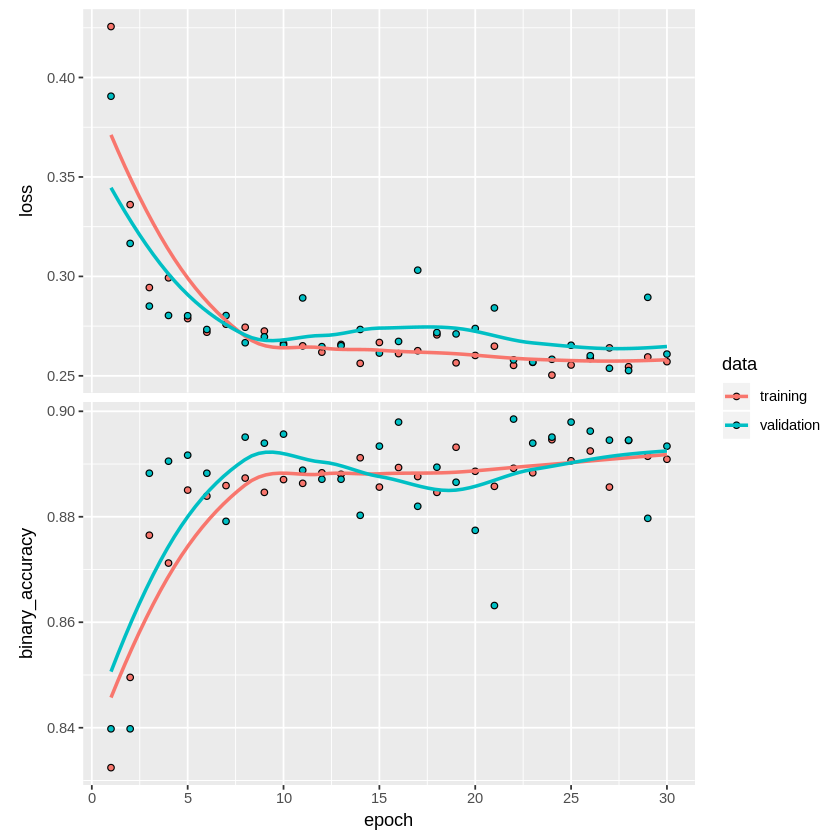

In [55]:
#::GMG::Veo el resultado

plot(history_1)

In [56]:
ls()

[1] "history_1"       "modelo_class_1"  "normalize"       "occurrence"     
 [5] "precip"          "timeKERAS"       "timeKERAS_begin" "timeKERAS_end"  
 [9] "xTest"           "xTest_n"         "xTrain"          "xTrain_n"       
[13] "yTrain"

In [58]:
list.files(path = '.')

[1] "data"                                
[2] "m1969-tarea-2-keras-prediccion.ipynb"

In [63]:
# https://keras.io/getting-started/faq/#how-can-i-save-a-keras-model
keras::save_model_hdf5('gmg-model-450-5-1-sgd.h5', object = modelo_class_1)

In [74]:
base::save(history_1, timeKERAS, file = 'gmg-sesion-modelo-1.rda')

In [75]:
list.files(path = '.')

[1] "data"                                
[2] "gmg-model-450-5-1-sgd.h5"            
[3] "gmg-sesion-modelo-1.rda"             
[4] "m1969-tarea-2-keras-prediccion.ipynb"

### Overfitting

#### dropout

In [82]:
#::GMG::Pruebo un dropout()
modelo_class_2 <- keras_model_sequential()
modelo_class_2 %>% 
  layer_dense(units = 5, input_shape = c(450), activation = 'sigmoid') %>%
  layer_dropout(rate = 0.1) %>%
  layer_dense(units = 1 , activation = 'sigmoid') 
modelo_class_2 %>% compile(
  optimizer = optimizer_sgd(lr = 0.1, momentum = 0.9),
  loss='binary_crossentropy',
  metrics='binary_accuracy'
)

In [83]:
timeKERAS_begin <- Sys.time()
history_2 <- modelo_class_2 %>% fit(xTrain_n, occurrence, 
                                epochs = 30, 
                                batch_size = 100,
                                validation_split = 0.2)
timeKERAS_end <- Sys.time()
timeKERAS <- timeKERAS_end - timeKERAS_begin
timeKERAS

Time difference of 18.68778 secs

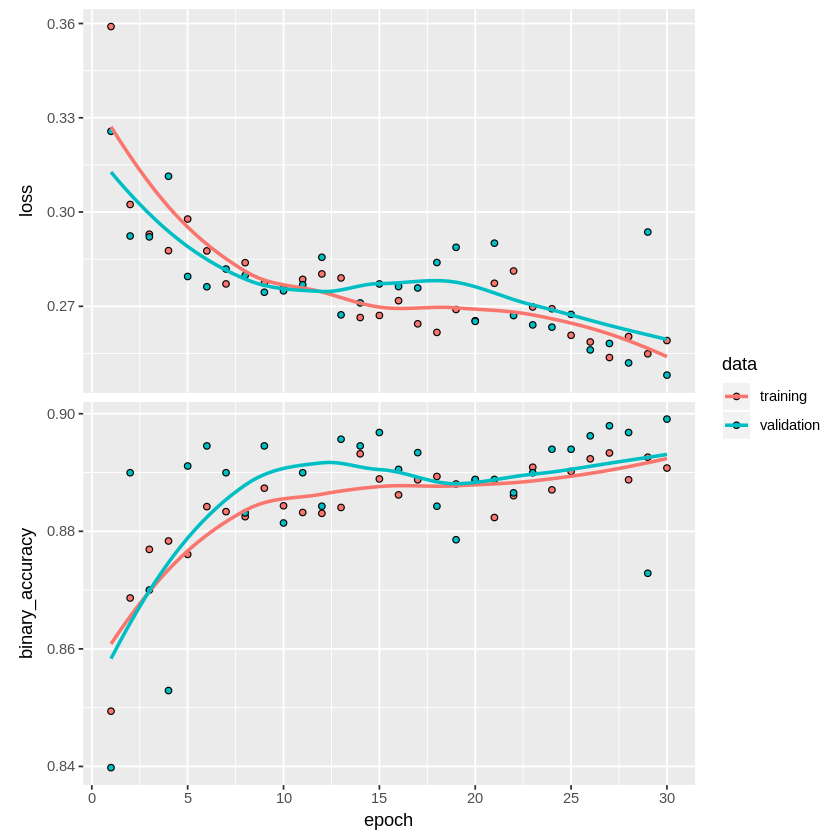

In [84]:
#::GMG::La mejora NO es muy significativa
plot(history_2)

In [85]:
keras::save_model_hdf5('gmg-model-450-5-1-sgd-dropout.h5', object = modelo_class_2)
base::save(history_2, timeKERAS, file = 'gmg-sesion-modelo-2.rda')

In [86]:
list.files(path = '.')

[1] "data"                                
[2] "gmg-model-450-5-1-sgd-dropout.h5"    
[3] "gmg-model-450-5-1-sgd.h5"            
[4] "gmg-sesion-modelo-1.rda"             
[5] "gmg-sesion-modelo-2.rda"             
[6] "m1969-tarea-2-keras-prediccion.ipynb"

#### Early stopping

In [87]:
#::GMG:: Pruebo early-stopping
callbacks = list(keras::callback_early_stopping(patience = 20), 
                 keras::callback_model_checkpoint(
                     filepath=paste0('gmg-mdel-450-5-1-sgd-early-stopping.h5'), 
                     monitor='val_loss', 
                     save_best_only = TRUE
                 )
)

In [88]:
modelo_class_3 <- keras_model_sequential()
modelo_class_3 %>% 
  layer_dense(units = 5, input_shape = c(450), activation = 'sigmoid') %>%
  layer_dropout(rate = 0.1) %>%
  layer_dense(units = 1 , activation = 'sigmoid') 
modelo_class_3 %>% compile(
  optimizer = optimizer_sgd(lr = 0.1, momentum = 0.9),
  loss='binary_crossentropy',
  metrics='binary_accuracy'
)

In [89]:
timeKERAS_begin <- Sys.time()
history_3 <- modelo_class_3 %>% fit(xTrain_n, occurrence, 
                                epochs = 30, 
                                batch_size = 100,
                                validation_split = 0.2,
                                callbacks = callbacks)
timeKERAS_end <- Sys.time()
timeKERAS <- timeKERAS_end - timeKERAS_begin
timeKERAS

Time difference of 21.68579 secs

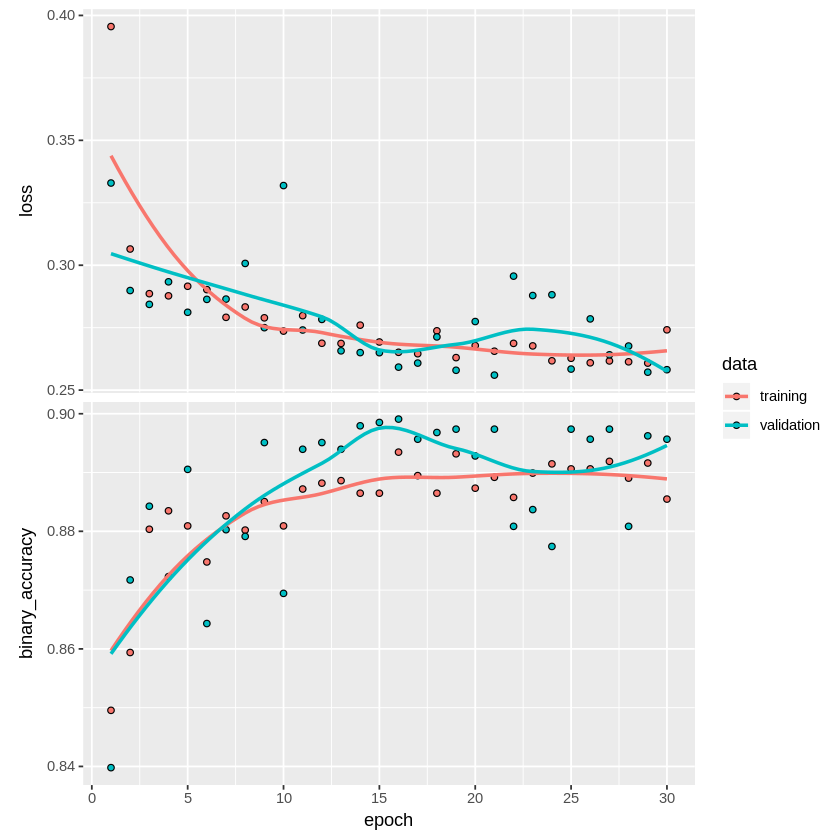

In [90]:
plot(history_3)

In [91]:
base::save(history_3, timeKERAS, file = 'gmg-sesion-modelo-3.rda')
list.files(path = '.')

[1] "data"                                  
[2] "gmg-mdel-450-5-1-sgd-early-stopping.h5"
[3] "gmg-model-450-5-1-sgd-dropout.h5"      
[4] "gmg-model-450-5-1-sgd.h5"              
[5] "gmg-sesion-modelo-1.rda"               
[6] "gmg-sesion-modelo-2.rda"               
[7] "gmg-sesion-modelo-3.rda"               
[8] "m1969-tarea-2-keras-prediccion.ipynb"

### Métricas alternativas

In [72]:
#::GMG::Parece que consigo una buena accuracy entorno a 0.89
#::nota:: no obstante debido a la falta de balance de clases decido introducir
#         otras dos métricas: f1_score y auc
#::nota:: si quiero hacerlo de forma integrada con el fit hay que programar
#         las funciones de métrica con funciones internas de keras k_func()
#         lo cual resulta complicado (!)
# https://keras.io/metrics/#custom-metrics
# https://rpubs.com/burchz/KerasCustomLoss


In [ ]:
# Paso 5. (opcional) regularización L1, L2, ElasticNet(L1/L2)


In [ ]:
# una medida mejor que accuracy cuando hay desequlibrio entre clases
# Fmeasure <- 2 * precision * recall / (precision + recall)

In [ ]:
#::GMG::Comienzo con una red "simple" con una capa oculta de 10 neuronas
# Paso 2. Defino la topología de la red neuronal# 450 (entradas) -> 16 (hidden layer 1) -> 1 (output layer)
# hiperparámetros: activation (sigmoid), units (20)
# ::duda:: ¿layer_input?
# https://keras.rstudio.com/reference/layer_input.html
#model_1 %>% 
#  layer_dense(units = 5, input_shape = c(450), activation = "sigmoid") %>% 
#  layer_dense(units = 5, activation = "sigmoid") %>% 
#  layer_dense(units = 1, activation = "sigmoid")

In [ ]:
# Paso X: evaluación final el modelo
# ::GMG::El problema que tenemos aquí es que no tenemos el yTest
#        por lo tanto este sería el paso previo a la grabación del
#        resultado que nos piden
#pred <- predict(modelo_class,x_test)

### Tuning de hiperparametros

## Modelo de Regresión

### Construcción de la red inicial

### Entrenamiento

### Tuning de hiperparametros

## Grabación de modelos